#**ENSEMBLE TECHNIQUES**

We are going to build a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several independent variables like, checking account balance, credit history, purpose, loan amount etc. For more details on the dataset, please see source at https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

## **Activities**:


1. Data Pre-processing
2. Building Machine Learning models:

  a. Decision Tree 

  b. Regularization to Prune Decision Tree

  c. Ensemble models

    i) Bagging

    ii) AdaBoosting

    iii)  GradientBoost

    iv) XGBoost

    v) Random Forest


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
creditData = pd.read_csv("credit.csv")
creditData.head(10) #several missing values!

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [3]:
creditData.shape

(1000, 17)

In [4]:
creditData.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

Lets convert the columns with an 'object' datatype into categorical variables

In [5]:
for feature in creditData.columns: # Loop through all columns in the dataframe
    if creditData[feature].dtype == 'object': # Only apply for columns with categorical strings
        creditData[feature] = pd.Categorical(creditData[feature])# Replace strings with an integer
creditData.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [6]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [7]:
print(creditData.checking_balance.value_counts())
print('-'*50)
print(creditData.credit_history.value_counts())
print('-'*50)
print(creditData.purpose.value_counts())
print('-'*50)
print(creditData.savings_balance.value_counts())
print('-'*50)
print(creditData.employment_duration.value_counts())
print('-'*50)
print(creditData.other_credit.value_counts())
print('-'*50)
print(creditData.housing.value_counts())
print('-'*50)
print(creditData.job.value_counts())
print('-'*50)
print(creditData.phone.value_counts())


unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
--------------------------------------------------
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
--------------------------------------------------
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
--------------------------------------------------
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
--------------------------------------------------
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
--------------------------------------------------
none     814
bank     139
store     47
Name:

In [8]:
#those features with order in their categories 

replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
                    }


#those features with NO order in their categories                   
oneHotCols=["purpose","housing","other_credit","job"]


In [9]:
creditData=creditData.replace(replaceStruct)
creditData=pd.get_dummies(creditData, columns=oneHotCols)
creditData.head(10)


,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [10]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   category
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   category
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   category
 5   employment_duration           1000 non-null   category
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   category
 12  default                       1000 non-null   cat

## Split Data

In [11]:
creditData.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0


In [12]:
X = creditData.drop("default" , axis=1)
y = creditData.pop("default")

In [13]:
X

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1,12,3,1736,1,4,3,4,31,1,...,0,1,0,0,1,0,0,0,0,1
996,1,30,3,3857,1,3,4,4,40,1,...,0,1,0,0,1,0,1,0,0,0
997,-1,12,3,804,1,5,4,4,38,1,...,0,1,0,0,1,0,0,1,0,0
998,1,45,3,1845,1,3,4,4,23,1,...,1,0,0,0,1,0,0,1,0,0


In [14]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [16]:
print('X_train and shape: \n{} \n\n{}\n\n X_test and shape:\n {} \n\n {}\n\n y_train and shape:\n{} \n\n {}\n\n y_test and shape:\n{} \n\n{}\n'.format(X_train,X_train.shape,X_test,X_test.shape,y_train,y_train.shape,y_test,y_test.shape))

X_train and shape: 
    checking_balance  months_loan_duration credit_history  amount  \
731                1                    24              3    1987   
716               -1                    30              1    3077   
640                1                    18              3     750   
804                2                    12              3    7472   
737                1                    18              3    4380   
..               ...                   ...            ...     ...   
767               -1                    10              3    2901   
72                 1                     8              1    1164   
908               -1                    15              2    3594   
235                1                    24              3    1823   
37                 3                    18              3    2100   

    savings_balance employment_duration  percent_of_income  \
731               1                   3                  2   
716              -1        

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

In [17]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [18]:
print('Training data score:{} '.format(dTree.score(X_train, y_train)))
print('Training data is overfitting')
print('Test data score:{} '. format(dTree.score(X_test, y_test)))



Training data score:1.0 
Training data is overfitting
Test data score:0.6933333333333334 


## Prunning: Reducing over fitting (Regularization)

In [19]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print('Train data score:{} '.format(dTreeR.score(X_train, y_train)))
print('Test data score:{} '.format(dTreeR.score(X_test, y_test)))

Train data score:0.7528571428571429 
Test data score:0.7433333333333333 


In [20]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

pd.DataFrame(dTreeR.feature_importances_, columns = ["Importance"], index = X_train.columns)

,Importance
checking_balance,0.492510
months_loan_duration,0.169806
credit_history,0.166109
amount,0.000000
savings_balance,0.064467
employment_duration,0.000000
percent_of_income,0.000000
years_at_residence,0.000000
age,0.000000
existing_loans_count,0.000000


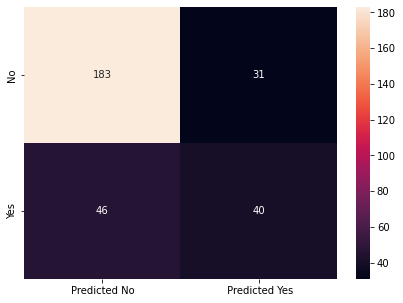

In [21]:
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');


#                             Ensemble Learning - Bagging

Builds on complex models and helps to avoid Overfitting. It samples the dataset to feed to each weak learner in parallel and uses voting mechanism to provide the final output.

In [22]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


Test data score using bagging: 0.7733333333333333


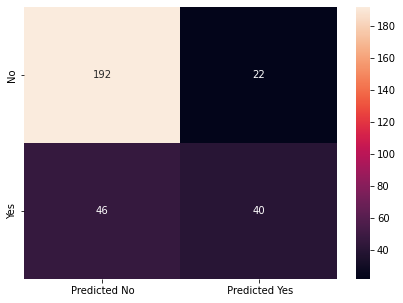

In [23]:
y_predict = bgcl.predict(X_test)

print('Test data score using bagging: {}'.format(bgcl.score(X_test , y_test)))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');



# Ensemble Learning - AdaBoosting

Here it builds on simple models and each model builds on the errors or residuals of the previous model in sequence.
If you try to use the complex base model ***base_estimator=dTree***, you will realise that it does quite poor, this is because the first model in the sequence does really well and the rest of the models does not really have much to do and they end up hurting the first model instead of helping. You can rather use the ***base_estimator=dTreeR*** which is a simple model and you will realise some improvement. 

The best approach is to leave the *AdaBoost* to figure it out and start with very simple base model with a depth of **1**.

In [24]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


The test score using AdaBoost : 0.74


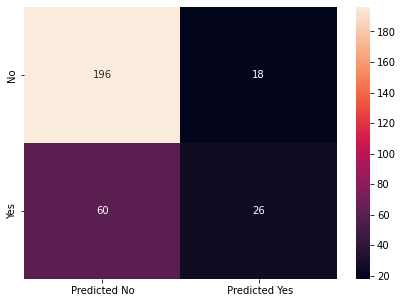

In [25]:
y_predict = abcl.predict(X_test)
print('The test score using AdaBoost : {}'.format(abcl.score(X_test , y_test)))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');



#                     Ensemble Learning - GradientBoost

Gradient Boost also uses simple base leaners. The first base learner tries to predict our target **(Y)** and gives us **(y_hat)** and the next model tries to predict the difference between *Y* and *y_hat*, **(Y -- y_hat)**, which is basically the residuals. Third model tries to predict the residuals from the second model and so on...

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


The test score using Gradient Boost : 0.74


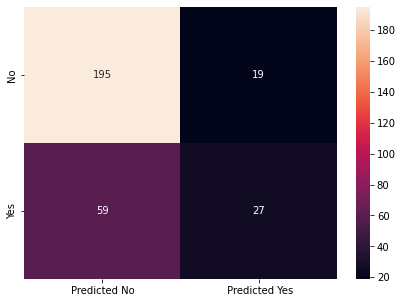

In [27]:
y_predict = gbcl.predict(X_test)
print('The test score using Gradient Boost : {}'.format(gbcl.score(X_test, y_test)))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

#                     Ensemble Learning - XGBoost

It is an extension of the Gradient Boost technique.

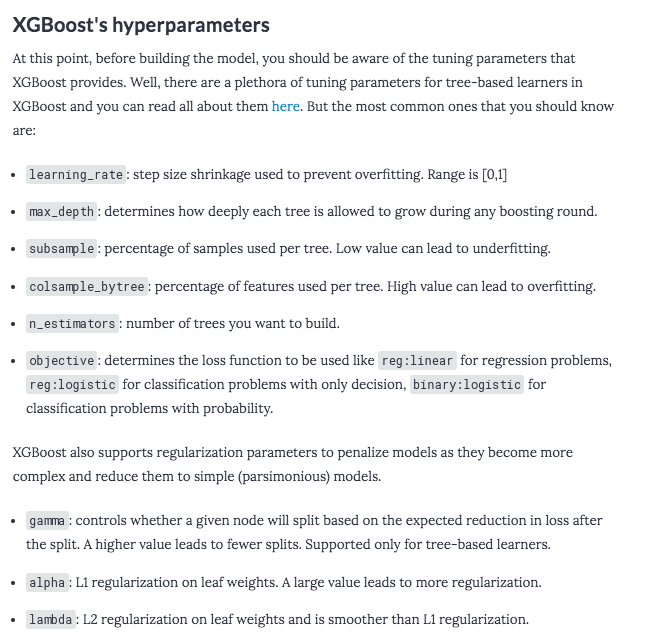

In [28]:
X_train

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
731,1,24,3,1987,1,3,2,4,21,1,...,0,0,1,0,1,0,0,0,0,1
716,-1,30,1,3077,-1,5,3,2,40,2,...,0,1,0,0,1,0,0,1,0,0
640,1,18,3,750,1,1,4,1,27,1,...,0,1,0,0,1,0,0,0,1,0
804,2,12,3,7472,-1,1,1,2,24,1,...,0,0,1,0,1,0,0,0,1,0
737,1,18,3,4380,2,3,3,4,35,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,-1,10,3,2901,-1,2,1,4,31,1,...,0,0,1,0,1,0,0,1,0,0
72,1,8,1,1164,1,5,3,4,51,2,...,1,0,0,1,0,0,1,0,0,0
908,-1,15,2,3594,1,2,1,2,46,2,...,0,1,0,0,1,0,0,0,0,1
235,1,24,3,1823,1,1,4,2,30,1,...,0,1,0,0,0,1,1,0,0,0


In [29]:
y_train

731    1
716    0
640    1
804    0
737    0
      ..
767    0
72     0
908    0
235    1
37     1
Name: default, Length: 700, dtype: category
Categories (2, int64): [0, 1]

In [30]:
#pip install xgboost

In [31]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 731 to 37
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              700 non-null    category
 1   months_loan_duration          700 non-null    int64   
 2   credit_history                700 non-null    category
 3   amount                        700 non-null    int64   
 4   savings_balance               700 non-null    category
 5   employment_duration           700 non-null    category
 6   percent_of_income             700 non-null    int64   
 7   years_at_residence            700 non-null    int64   
 8   age                           700 non-null    int64   
 9   existing_loans_count          700 non-null    int64   
 10  dependents                    700 non-null    int64   
 11  phone                         700 non-null    category
 12  purpose_business              700 non-null    uin

In [32]:
X_train[['checking_balance','credit_history','savings_balance','employment_duration','phone']]= X_train[['checking_balance','credit_history','savings_balance','employment_duration','phone']].astype(int)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 731 to 37
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              700 non-null    int32
 1   months_loan_duration          700 non-null    int64
 2   credit_history                700 non-null    int32
 3   amount                        700 non-null    int64
 4   savings_balance               700 non-null    int32
 5   employment_duration           700 non-null    int32
 6   percent_of_income             700 non-null    int64
 7   years_at_residence            700 non-null    int64
 8   age                           700 non-null    int64
 9   existing_loans_count          700 non-null    int64
 10  dependents                    700 non-null    int64
 11  phone                         700 non-null    int32
 12  purpose_business              700 non-null    uint8
 13  purpose_car                   700 

In [34]:
X_test[['checking_balance','credit_history','savings_balance','employment_duration','phone']]= X_test[['checking_balance','credit_history','savings_balance','employment_duration','phone']].astype(int)

In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 507 to 349
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              300 non-null    int32
 1   months_loan_duration          300 non-null    int64
 2   credit_history                300 non-null    int32
 3   amount                        300 non-null    int64
 4   savings_balance               300 non-null    int32
 5   employment_duration           300 non-null    int32
 6   percent_of_income             300 non-null    int64
 7   years_at_residence            300 non-null    int64
 8   age                           300 non-null    int64
 9   existing_loans_count          300 non-null    int64
 10  dependents                    300 non-null    int64
 11  phone                         300 non-null    int32
 12  purpose_business              300 non-null    uint8
 13  purpose_car                   300

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

The test score using XGBoost : 0.7433333333333333


<AxesSubplot:>

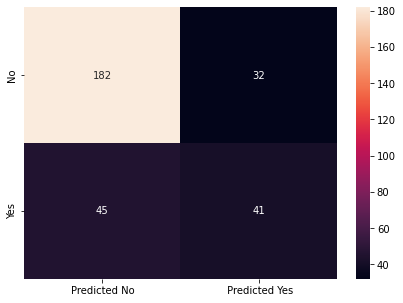

In [37]:
y_predict = xgb.predict(X_test)
print('The test score using XGBoost : {}'.format(xgb.score(X_test , y_test)))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


You can perform hyperparameter tuning on the XGBoost model to get a better score.

# Ensemble RandomForest Classifier

In random forest we subset the rows to create different trees. Again while building the tree, we again randomly subset the initial subset to grow the tree further.

It needs to start with a complex model since it is a *Bagging* technique, so if you start with a simple tree with a depth of say 3, you will realise that the score will decrease. As you increase the depth, the performance will increase as well.
At some point the depth wouldn't matter to improve the performance anymore, even if you increase it. It is therefore advisable to allow the algorithm to choose the best depth by itself.

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


The test score using Random forest : 0.78


<AxesSubplot:>

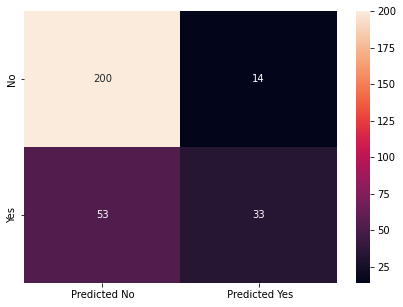

In [39]:
y_predict = rfcl.predict(X_test)
print('The test score using Random forest : {:.2f}'.format(rfcl.score(X_test, y_test)))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')